# LAPTOP PRICE PREDICTION – FINANCIAL ANALYSIS

# Overview

This project revolves around creating a web application focused on the prediction of the prices of the laptop. The model is used to calculate the ideal price of the laptop given the different input , its significance lies in assisting the people in understanding the price of the laptop on basis of the component they select and help them in making good investment.

The web application's functionality is straightforward: users input the brand, type of the laptop, ram, weight, touchscreen, IPS, screen size, resolution, cpu, hdd, sdd, gpu, operating system of the laptop they want to buy. In return, the application provides them with the potential estimated price of the laptop they are looking to buy. This empowers individual with valuable insights, enabling them to assess the risk and potential reward of their investment choices more effectively.


# 0. Doing The Essential

In [1]:
# Importing all the nessesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This section imports the necessary libraries for the project. Here's a list of what each library does:

-	numpy: A Python library used for creating web applications with simple Python scripts.

-	matplotlib: Matplotlib is a comprehensive 2D plotting library for Python, enabling the creation of high-quality visualizations with ease

-	seaborn: is a statistical data visualization library based on Matplotlib, providing an aesthetically pleasing and informative interface for creating appealing statistical graphics in Python.

-	pandas: A popular library for data manipulation and analysis.


In [2]:
# Importing the dataset
df = pd.read_csv('laptop_data.csv')

In [3]:
# Overview of the datatype of all the features
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Number of rows and columns in the dataset
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# Checking the duplicate in the dataset
df.duplicated().sum()

0

In [7]:
# checking the null values in the dataset
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
# Droping the "Unamed: 0" column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
# Replacing the 'GB' with ""
df['Ram'] = df['Ram'].str.replace('GB','')

# Replacing the 'KG' with ""
df['Weight'] = df['Weight'].str.replace('kg','')

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
# Converting the object datatype of ram to int
df['Ram'] = df['Ram'].astype('int32')

# Converting the object datatype of weight to float
df['Weight'] = df['Weight'].astype('float32')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# 1. Exploratory Data Analysis

- Exploratory Data Analysis (EDA) is a critical phase in the data analysis process where the primary goal is to gain insights into a dataset's structure, patterns, and underlying relationships. It involves employing statistical graphics, summary statistics, and visualization techniques to systematically investigate and summarize key characteristics of the data. 

- EDA aims to uncover trends, anomalies, and potential outliers, helping analysts make informed decisions about subsequent analyses or modeling. By visually and quantitatively exploring the data, EDA not only facilitates a better understanding of the dataset but also guides the formulation of hypotheses and informs the selection of appropriate statistical methods for more in-depth analysis.






C:\Users\kaift\AppData\Local\Temp\ipykernel_14832\1575515087.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

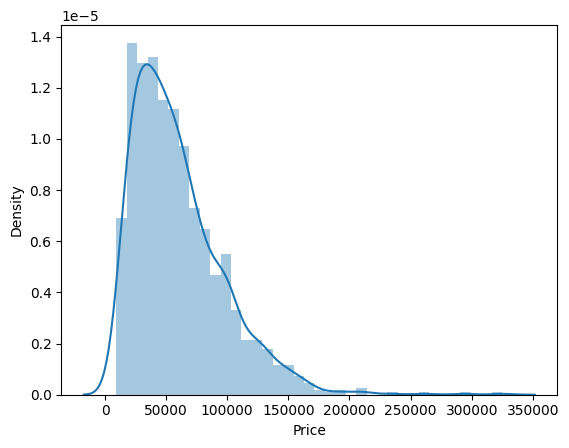

In [14]:
# Finding the distribution of the price
sns.distplot(df['Price'])

Observation:
-	laptop price estimates spanning from Rs.9,270 to Rs.3,24,954, with a notable concentration within the range of Rs.30,000 to Rs.1,50,000. This distribution is characterized by a right-skewed pattern, indicative of a prevalence of laptops within the specified moderate to high-value spectrum.


<Axes: xlabel='Company'>

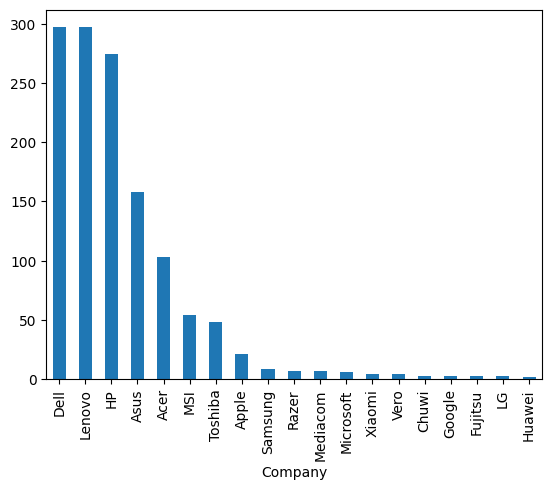

In [15]:
# Distribution of the laptop on basis of the brand
df['Company'].value_counts().plot(kind='bar')

Observation
-	The dataset prominently features three leading laptop brands: Dell, Lenovo, and HP, exhibiting the highest occurrence. Subsequently, Asus, Acer, MSI, and Toshiba follow suit in descending order, with counts surpassing 50. Beyond these major players, a multitude of other brands registers in the dataset, each with a count below 50, as illustrated in the bar chart where brand names are represented along the X-axis and the corresponding laptop counts are depicted along the Y-axis.


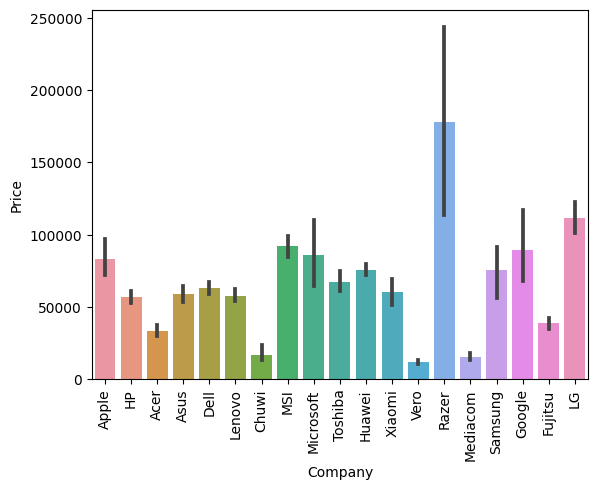

In [16]:
# Price vs brand relationship
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Observation
-	Notably, Apple MacBooks consistently appear with prices below the Rs.1,00,000 thresholds in the dataset. This revelation is surprising, considering the prevalent trend of Apple products in India typically falling within the upper price range, often exceeding Rs.1,00,000. However, it's important to clarify that the observed lower prices in the dataset are attributed to older models of MacBooks, which are reflective of historical pricing. In contrast, Razer laptops stand out with a notable prevalence of high-cost models, often associated with gaming configurations.

-	Meanwhile, the trio of Dell, Lenovo, and HP, collectively constituting a substantial portion of sales, share a relatively similar pricing bracket. Other brands within the dataset fall within the spectrum, bridging the gap between the comparatively lower-priced Apple MacBooks and the higher-end Razer laptops, forming a diverse range.


<Axes: xlabel='TypeName'>

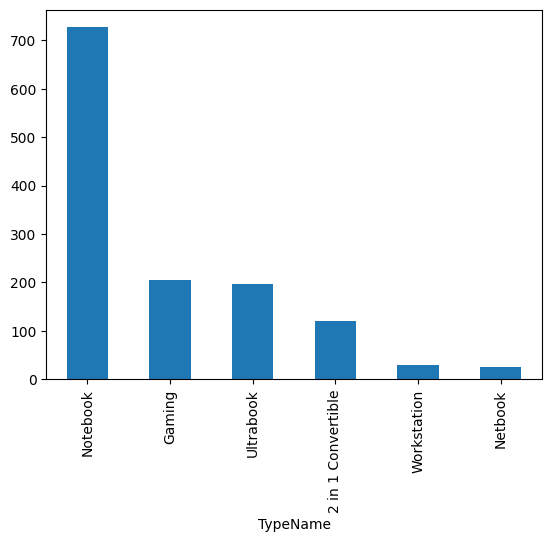

In [17]:
# Count of the type of laptops in the dataset
df['TypeName'].value_counts().plot(kind='bar')

Observation
-	The dataset predominantly features over 700 instances of "Notebook" laptops, surpassing "Gaming" and "Ultrabook" categories, each with around 200 occurrences. A notable contrast exists, particularly with a 500-instance difference between "Notebook" and "Gaming"/"Ultrabook," highlighting significant user preferences. 

-	Conversely, "2-in-1 Convertible," "Workstation," and "Netbook" exhibit lower counts, with the latter two falling below 100 occurrences. The "2-in-1 Convertible" category, though less frequent than "Notebook," still stands at approximately 100 instances, suggesting a moderate presence.


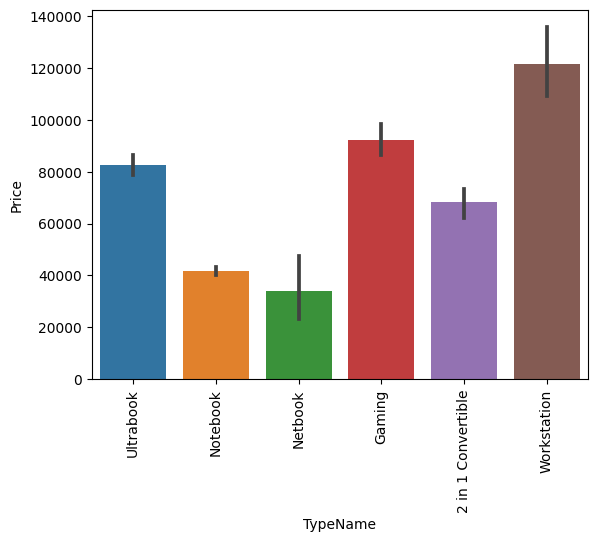

In [18]:
# Avg price of the type of laptops
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Observation:
-	In terms of pricing, Ultrabooks and Gaming laptops exhibit a close resemblance, with Ultrabooks priced at approximately Rs. 80,000 and Gaming laptops hovering around Rs. 85,000.

- Notably, the Workstation category stands out as the most expensive, commanding a premium price point. The 2-in-1 Convertible laptops are positioned around Rs. 60,000, while Notebooks and Netbooks emerge as the more budget-friendly options, ranging from Rs. 30,000 to Rs. 40,000, with Netbooks representing the lower end of this spectrum. This diversity in pricing underscores the wide range of options available in the laptop market, catering to varying budget considerations and preferences.

-	The error bars also show that some types of laptops have more consistent prices than others. For example, the error bar for the Ultrabook laptop is relatively small, which means that most Ultrabook laptops have similar prices. On the other hand, the error bar for the Workstation laptop is relatively large, which means that there is a wide range of prices for Workstation laptops. This could indicate that some types of laptops are more standardized than others, or that some types of laptops have more diverse options and preferences than others.



C:\Users\kaift\AppData\Local\Temp\ipykernel_14832\1974455912.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

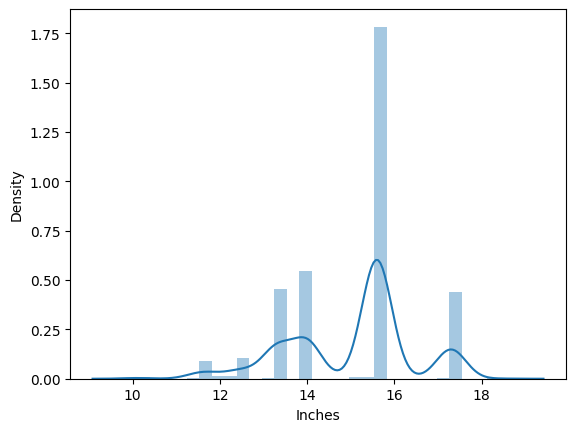

In [19]:
# Distribution of laptop on basis of its screen size
sns.distplot(df['Inches'])

Observation:
-	The graph shows the relationship between the density of the laptops and its length in inches. The density is measured in units of mass per unit volume, such as grams per cubic centimetre.

-	The graph has a bell-shaped curve, which means that the density follows a normal distribution. This means that most of the values are clustered around the mean or average, and the values become less frequent as they deviate from the mean.

-	The graph has a peak at around 16 inches, which means that this is the mode or the most common value of the screen size. The density at this point is about 1.5.

-	The graph has a smaller peak at around 14 inches, which means that this is another common value of the screen size, but less frequent than 16 inches. The density at this point is about 1.25.

-	The graph has another peak around 17 inches, which means that this is another common value of the screen size. The density of this point is about 0.20


<Axes: xlabel='Inches', ylabel='Price'>

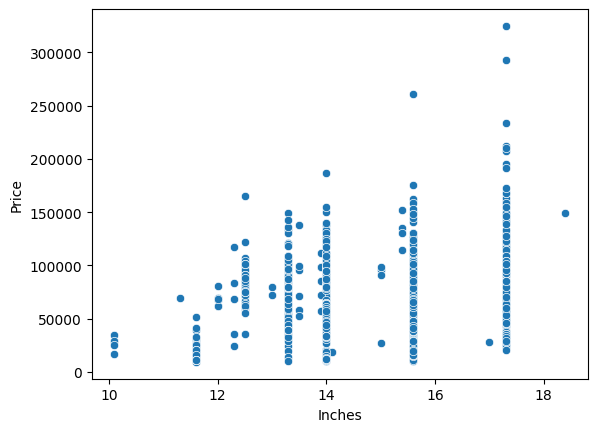

In [20]:
# Scatterplot of the price of the laptop on basis of its screen size
sns.scatterplot(x=df['Inches'],y=df['Price'])

Observation: 
-	The dataset reveals a predominant clustering of laptop screen sizes within the range of 13 inches to 17 inches, indicating a commonality in the dimensions of most laptops. However, noteworthy outliers exist, particularly among laptops featuring a 17-inch screen size. 

-	These specific outliers are associated with significantly higher costs, suggesting that the larger screen size contributes to an elevated price range. The presence of such outliers emphasizes the diversity within the dataset, with certain laptops deviating from the typical screen size and pricing patterns.


 # 2. Fixing the Necessary columns for the prediction

### 2.1 Fixing the 'ScreenResolution' Column

Before we start analysing the data, it's important to understand why we're taking a specific approach. In this dataset, key information, like IPS display, touchscreen, and screen resolution, is all packed into one column. To simplify our analysis, we want to calculate the Pixel Per Inch (PPI) metric. This allows us to combine these various screen features into one standardized value, which we can use in our predictive model. Using PPI helps us take a more thorough and precise approach to predicting laptop prices.


In [21]:
# Unique values of the column
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

Observation
- The 'resolution' column contains a wealth of information. We can extract whether the laptop has an IPS display and determine if it's a touchscreen device.


In [22]:
# Making a new column touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

Note 

-	This code creates a new 'Touchscreen' column in the DataFrame 'df,' assigning a value of 1 if the corresponding 'Screen Resolution' contains 'Touchscreen,' and 0 otherwise, utilizing a lambda function with the 'apply' method.

-	We've introduced a novel column termed 'Touchscreen' in the dataset. The values within this column are designated as '1' to denote laptops equipped with touchscreen functionality and '0' to signify laptops lacking touchscreen features.

-	This strategic categorization allows for a clear and binary representation, enhancing the dataset's capacity to discern and analyse touchscreen attributes within the broader context of laptop characteristics.


In [23]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
486,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro M620,Windows 10,2.170,124568.6400,0
686,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,AMD Radeon 520,Windows 10,1.860,32639.8608,0
219,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.620,68145.1200,1
777,Acer,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.800,33886.0800,0
670,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.252,99519.0480,1


Observation:
- A new column called "Touchscreen" has been introduced. For rows where the value is 1, it indicates that the laptop is a touchscreen device, while a value of 0 signifies the absence of touchscreen functionality


<Axes: xlabel='Touchscreen'>

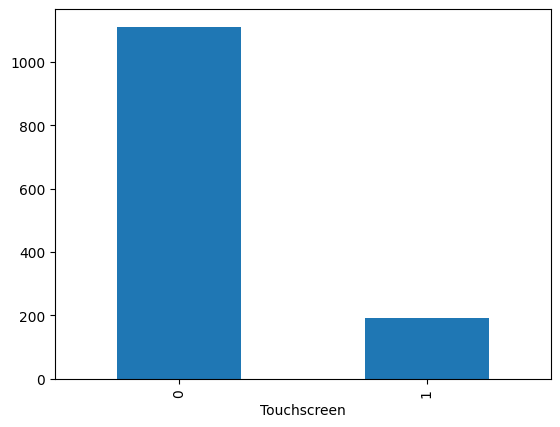

In [24]:
# Count of the touchscreen laptop vs not touchscreen laptop
df['Touchscreen'].value_counts().plot(kind='bar')

Observation:
-	A substantial proportion of laptops, totalling around 1000 units, do not feature touchscreen functionality, while a more modest count of 200 laptops incorporates this touch-enabled capability. 

-	This distribution underscores the prevalence of non-touchscreen laptops in the dataset, highlighting the varying technological specifications within the sampled devices.


<Axes: xlabel='Touchscreen', ylabel='Price'>

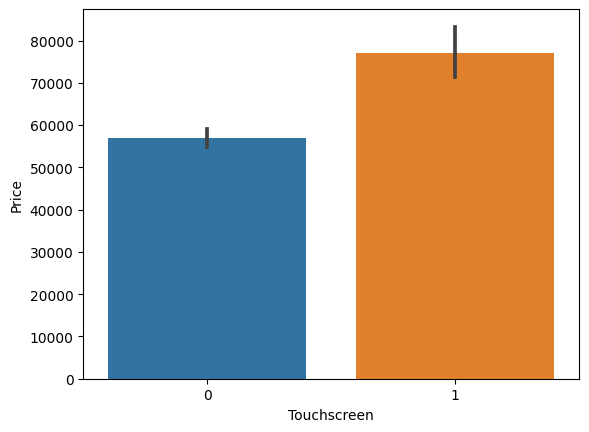

In [25]:
# Price of the touchscreen vs not touchscreen laptops
sns.barplot(x=df['Touchscreen'],y=df['Price'])

Observation:
-	The dataset reveals a notable price disparity between touchscreen and non-touchscreen laptops. Touchscreen laptops, albeit in lower numbers, command a higher average price of approximately Rs. 75,000. In contrast, non-touchscreen laptops, more abundant in the dataset, exhibit a comparatively lower average price, hovering around Rs. 58,000. The limited representation of touchscreen laptops contributes to a substantial variance in pricing, underlining the significance of touchscreen functionality as a determining factor in laptop costs.

-	the error bars also show the "non-touchscreen laptop" have more consistent prices than the "touchscreen laptop". For example, the error bar for the "non-touchscreen laptop" is relatively small, which means that most "non-touchscreen laptop" laptops have similar prices. 

-	On the other hand, the error bar for the "touchscreen laptop" is relatively large, which means that there is a wide range of prices for "touchscreen laptop".


In [26]:
# Making a new column name IPS
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


Observation:
-	We've introduced a novel column termed 'IPS' in the dataset. The values within this column are designated as '1' to denote laptops equipped with IPS functionality and '0' to signify laptops lacking IPS features.

-	This strategic categorization allows for a clear and binary representation, enhancing the dataset's capacity to discern and analyse IPS attributes within the broader context of laptop characteristics.


<Axes: xlabel='Ips'>

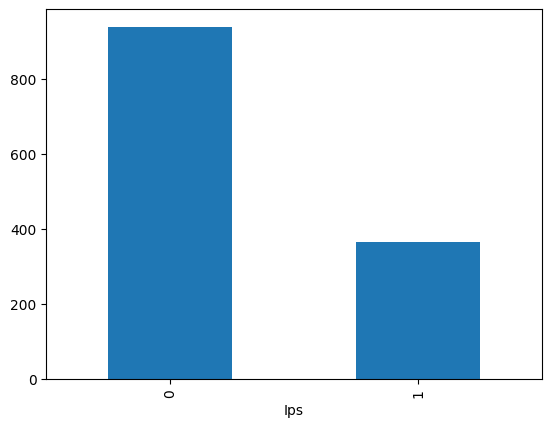

In [28]:
# Count of the Ips display in the dataset
df['Ips'].value_counts().plot(kind='bar')

Observation
-	There are more than 800 laptop which do not have the 'Ips' feature in it where around 400 laptops have 'Ips' feature in it


<Axes: xlabel='Ips', ylabel='Price'>

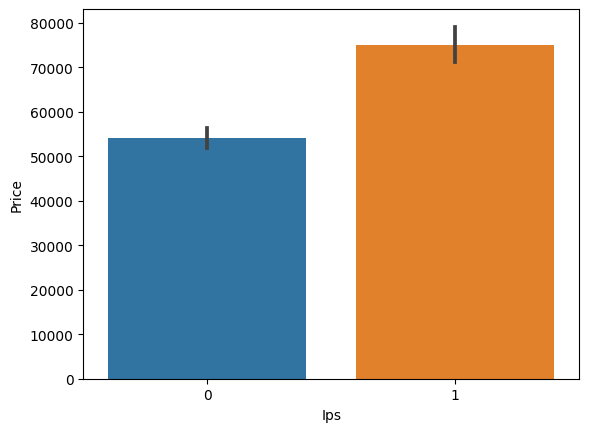

In [29]:
# Price of the Ips vs non-ips display
sns.barplot(x=df['Ips'],y=df['Price'])

Observation
-	The price of the "non-ips" display are less around Rs.55,000 whereas 'Ips' display cost more around Rs.70,000.

-	The error bars also show the " non-ips laptop" have more consistent prices than the "ips laptop". For example, the error bar for the "non-ips" is relatively small, which means that most "non-ips" laptops have similar prices. 

-	On the other hand, the error bar for the "ips" is relatively large, which means that there is a wide range of prices for "touchscreen laptop".


In [30]:
# Splitting the x-res and y-res
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [31]:
# Making new column which has "x-res info"
df['X_res'] = new[0]

# making new column which has "y-res info"
df['Y_res'] = new[1]

In [32]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
382,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.30,88178.4000,0,1,IPS Panel Full HD 1920,1080
399,Lenovo,Ultrabook,14.0,IPS Panel 2560x1440,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.13,139860.0000,0,1,IPS Panel 2560,1440
805,HP,Netbook,12.5,1366x768,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.26,74005.9200,0,0,1366,768
187,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,No OS,2.40,41505.1200,0,1,IPS Panel Full HD 1920,1080
230,Asus,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.37,21258.1872,0,0,1366,768


Observation: 
-	Although we've successfully created the 'X_res' column, it appears to retain some attached features or unwanted elements.

-	Now, we will try to separate the “feature” from the ‘x_res’

-	In short, we are trying to remove it as we have already made new columns for these features like “IPS” and “Touchscreen”.


In [33]:
# Fixing the x_res column
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [35]:
# Changing the datatype of the "x_res"
df['X_res'] = df['X_res'].astype('int')

# Changing the datatype of the "y_res"
df['Y_res'] = df['Y_res'].astype('int')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [37]:
# Calculating the ppi
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [38]:
# dropping the "screenResolution" column
df.drop(columns=['ScreenResolution'],inplace=True)

In [39]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [40]:
# dropping the 'Inches','X_res','Y_res' column
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

Note:

- We're getting rid of the 'Inches', 'X_res', and 'Y_res' columns in our dataset. We've already used these columns to calculate DPI, and now that we have that information, we don't need these columns cluttering our dataset anymore

In [41]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


### 2.2 Fixing the 'Cpu' Column

In [42]:
# Unique values of Cpu
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

Observation:

- There are many different kinds of processors, but some of them are not used very often. To make things simpler, we'll group these less common processors together and call them "Other Processors." This helps us organize and understand the variety of processors more easily.

In [43]:
# Making a new column as 'Cpu Name' 
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [44]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
1215,Acer,Netbook,Intel Celeron Dual Core 3205U 1.5GHz,2,32GB SSD,Intel HD Graphics,Chrome OS,1.30,9270.72,0,0,135.094211,Intel Celeron Dual
953,Asus,2 in 1 Convertible,Intel Core M M7-6Y75 1.2GHz,8,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.20,61751.52,0,0,176.232574,Intel Core M
1135,Lenovo,Notebook,Intel Core i7 6500U 2.5GHz,16,1.0TB Hybrid,AMD Radeon R7 M360,Windows 10,2.50,58554.72,0,0,141.211998,Intel Core i7
1127,HP,Ultrabook,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,100965.60,0,0,125.367428,Intel Core i5
1050,Lenovo,Notebook,Intel Core i7 6600U 2.6GHz,16,256GB SSD,Intel HD Graphics 520,Windows 7,1.10,139593.60,0,1,209.800683,Intel Core i7


In [45]:
# Function to group
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [46]:
# Applying Function to the 'Cpu brand' Column
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

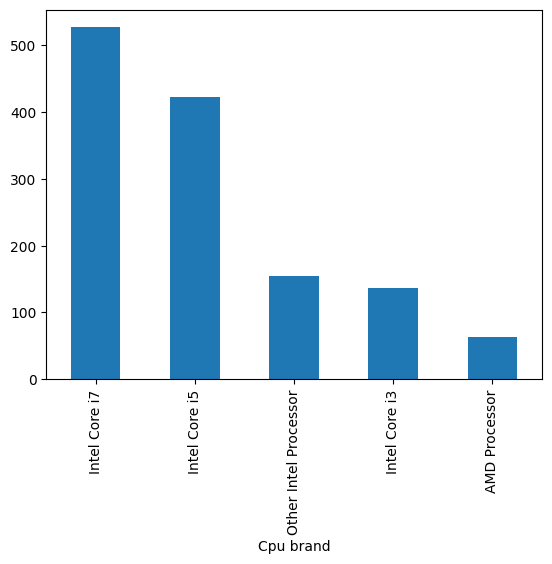

In [48]:
# Count of the brand of the 'Cpu'
df['Cpu brand'].value_counts().plot(kind='bar')

Observation: 
- The bar chart shows the number of laptops based on their CPU brands. On the horizontal axis (X-axis), we have different CPU brands like i7, i5, Intel Core i3, and AMD. The vertical axis (Y-axis) represents the count of laptops.

- The chart indicates that the Intel Core i7 is the most dominant, with approximately 500 laptops featuring this processor. Following closely is the i5 category, accounting for around 400 laptops. Intel Core i3 processors have a similar count, hovering around 150, while AMD processors have the least representation, with fewer than 100 laptops in the chart.

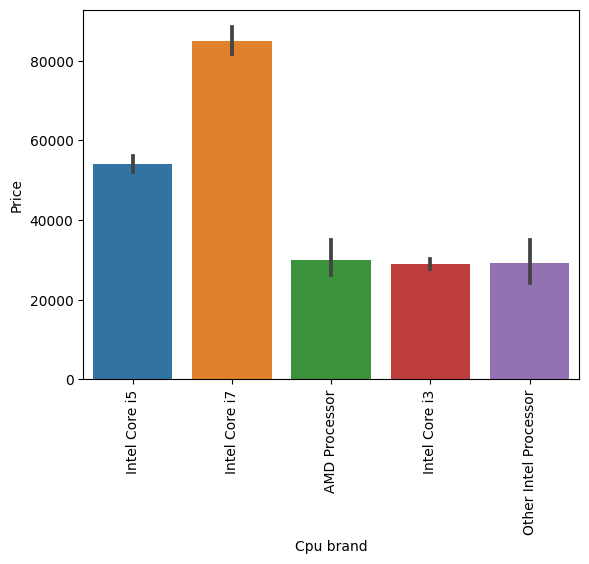

In [49]:
# Avg Price of the processors
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Observation:

- The Intel Core i7 is the most expensive CPU, costing about Rs 80,000, which seems fair considering its high performance. Next in line is the Intel Core i5, priced around Rs 55,000, offering a good balance between cost and performance. Interestingly, AMD processors, Intel Core i3, and other Intel processors all have a similar price, around Rs 30,000.However, it's worth noticing that there's a significant variation or error in the bars representing other Intel processors and AMD. This suggests that the pricing for these categories might be less consistent compared to the more stable pricing of Intel Core i3.






In [50]:
# dropping the column 'Cpu','Cpu Name'
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [51]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


### 2.3 Exploring the 'Ram' Column

Note 
- There is nothing to fix in this column or any information to extract

<Axes: xlabel='Ram'>

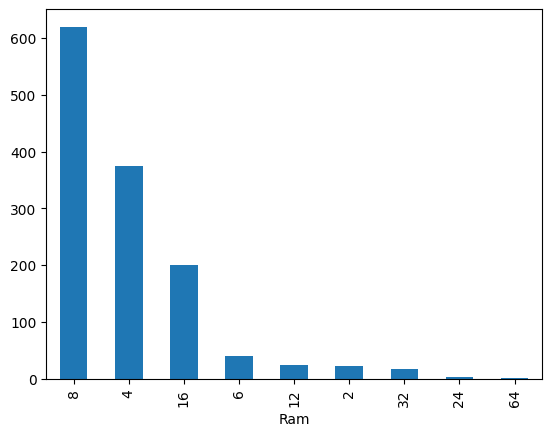

In [52]:
# count of the different memory of the ram
df['Ram'].value_counts().plot(kind='bar')

Observation:

- The majority of laptops come equipped with 8GB RAM, considered a sweet spot that allows for potential future upgrades. Surprisingly, laptops featuring 4GB RAM outnumber those with 16GB. Specifically, there are approximately 380 laptops with 4GB RAM, while the 16GB category includes around 200 laptops. The remaining RAM configurations, including those under 100 in count, seem to be less common among the available laptops.

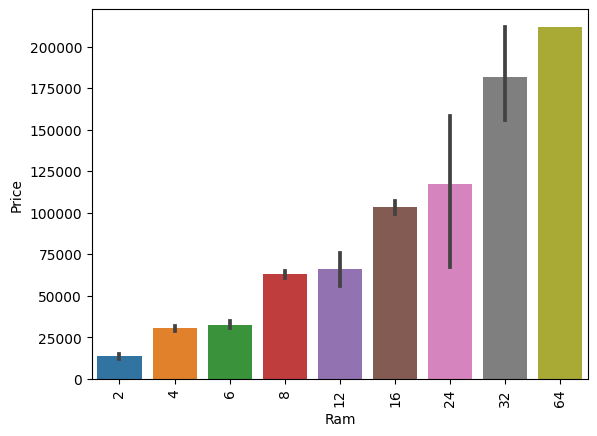

In [53]:
# Price of different memory of ram
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Observation:

- As anticipated, the price of RAM exhibits a direct correlation with the memory size of the RAM module. In simpler terms, larger RAM sizes tend to come with higher prices, aligning with the expectation that greater memory capacity typically incurs a higher cost.

### 2.4 Fixing the "Memory" column

In [54]:
# Unique values of the "Memory column"
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

Observation:

- The column contains a wealth of information regarding the type of memory a laptop possesses, indicating whether it's an SSD or HDD. It also provides details on the memory size. In cases where a laptop has both HDD and SSD, signifying a hybrid setup, this information is also included.

- So, to break it down, we're planning to create several new columns based on the existing column. These new columns will include ones for HDD, SSD, Flash Drive, and Hybrid configurations. This way, we can organize and categorize the information more effectively.

In [55]:
# Convert 'Memory' column to string, remove decimals, and remove 'GB' and replace 'TB' with '000'
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split the 'Memory' column into two parts using the '+' symbol
new = df["Memory"].str.split("+", n=1, expand=True)

# Create new columns 'first' and 'second' to store the split values
df["first"] = new[0]
df["first"] = df["first"].str.strip()
df["second"] = new[1]

# Create binary columns indicating the presence of different memory types
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from 'first' column
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Fill NaN values in 'second' column with '0'
df["second"].fillna("0", inplace=True)

# Create binary columns for the second part of the split
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from 'second' column
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Convert 'first' and 'second' columns to integers
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Calculate the total memory for each type and create new columns
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Drop unnecessary columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)


In [56]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
50,Lenovo,2 in 1 Convertible,4,64 Flash Storage,Intel HD Graphics 400,Android,0.69,16996.32,1,1,224.173809,Other Intel Processor,0,0,0,64
221,Lenovo,2 in 1 Convertible,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.74,47898.72,0,1,157.350512,Intel Core i5,0,256,0,0
984,Toshiba,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,1.75,48751.20,0,0,111.935204,Intel Core i5,500,0,0,0
870,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,2.38,56210.40,0,0,100.454670,Intel Core i5,500,0,0,0
83,Lenovo,Notebook,4,128 SSD,AMD R4 Graphics,Windows 10,2.20,21258.72,0,0,141.211998,AMD Processor,0,128,0,0


Observation: 

- We've generated four new columns, but considering that Hybrid and Flash Storage features are relatively uncommon, especially in older laptops, we're opting to drop these columns. This simplification helps streamline the data and focuses on more prevalent and relevant memory types

In [57]:
# Dropping the "Memory" Column
df.drop(columns=['Memory'],inplace=True)

In [58]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [59]:
# Droping the 'Hybrid','Flash_Storage' column
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [60]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


### 2.5 Fixing the "Gpu" Column

In [61]:
# Unique values in the "Gpu"
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

Observation:

- Since there's a variety of GPUs with limited data for each type, predicting accurately might be challenging. To simplify, we plan to categorize the graphics cards based on their brands, such as "Nvidia," "AMD," and "Intel." This segmentation will help focus our analysis on broader GPU categories, potentially improving prediction reliability.

In [62]:
# making a new column which only has Gpu brand
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [63]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [64]:
# checking the unique value of the "Gpu brand" column
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

Observation:

- Since the brand "ARM" appears in just one laptop, it's a rare occurrence. To keep our analysis focused and avoid potential outliers, we've decided to drop this specific brand from our dataset.

In [65]:
# Droping the "ARM" Column
df = df[df['Gpu brand'] != 'ARM']

In [66]:
# Unique values of the "Gpu brand"
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

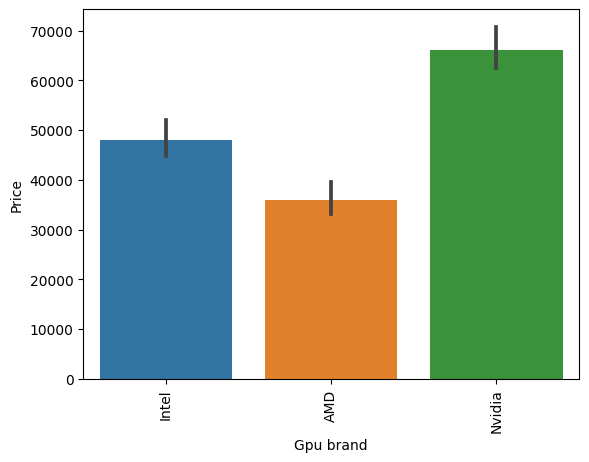

In [67]:
# Price of the gpu on basis of its brand
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

Observation:

- Nvidia processors take the top spot in terms of pricing, likely reflecting their exceptional performance. Nvidia is widely recognized as one of the leading companies in producing top-notch graphics cards in recent years

- Moving on to Intel graphics, it's important to note that Intel doesn't include a dedicated graphics card in their laptops. Instead, they offer integrated graphics with the CPU. Essentially, when you buy an Intel-powered laptop, you're paying for the CPU with a bit of GPU power included.

- AMD graphics cards stand out as the most budget-friendly option in the market. They are known for providing a good budget experience. However, it's worth mentioning that laptops with AMD processors are not as common; the market is largely dominated by Intel and Nvidia. AMD tends to have a stronger presence in the desktop market.

In [68]:
# droping the "Gpu" column
df.drop(columns=['Gpu'],inplace=True)

In [69]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


### 2.6 Fixing the "Opsys" column

In [70]:
# finding the unique values of the operating system
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

Observation:

- The newest operating system, Windows 10, holds the top spot in the market. Surprisingly, the category labeled "No OS" comes next. Following closely is Linux, well-known among cybersecurity developers. Despite being older, some people still use Windows 7. Notably, all MacBooks exclusively run on the macOS operating system.

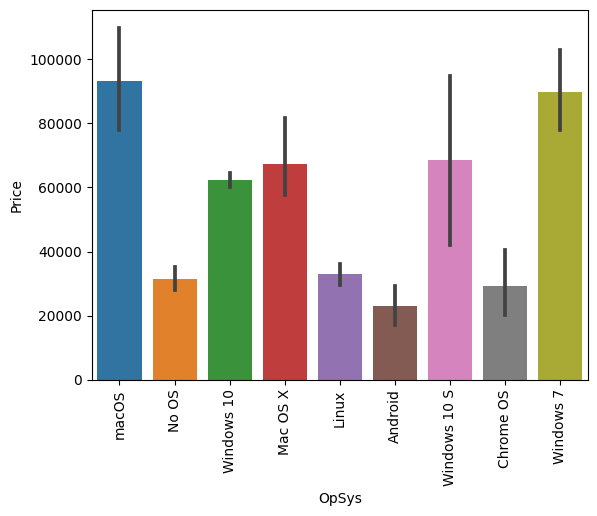

In [71]:
# price of the laptop on basis of its os
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Observation:

- Given the multitude of operating systems in laptops with relatively low numbers, the price difference is quite significant. To simplify our analysis, we're categorizing the operating systems into a few segments: Windows, macOS, and others. This segmentation will help us better understand and manage the variance in prices.

In [72]:
# Building the function to segment the "Os" 
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [73]:
# Making a new column and applying the function
df['os'] = df['OpSys'].apply(cat_os)

In [74]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [75]:
# Dropping the OS column
df.drop(columns=['OpSys'],inplace=True)

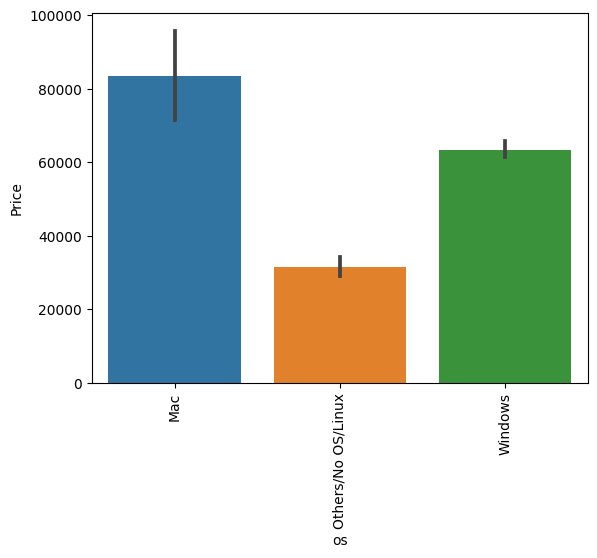

In [76]:
# price of the laptop on basis of the operating system
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Observation:

- Laptops featuring macOS have the highest price, approximately Rs 80,000. However, it's essential to note that the bar error variance is exceptionally high, indicating that the number of laptops with macOS is limited in the dataset. 

- In contrast, Windows, the most popular operating system, comes at a cost of around Rs 60,000. Other operating systems, collectively, have an average price of about Rs 30,000.

### 2.7 Exploring the "Weight" Column

C:\Users\kaift\AppData\Local\Temp\ipykernel_14832\1929279492.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

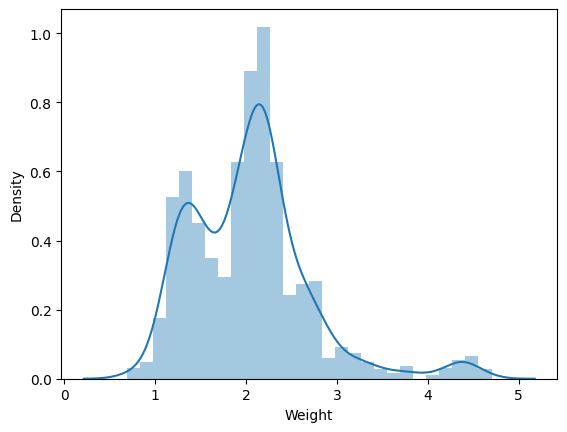

In [77]:
# Distribution of the weight of the laptop
sns.distplot(df['Weight'])

Observation: 

- The chart has a mean and median of around 2.5. This means that the average and the middle value of the weight variable are both close to 2.5.

- The chart has a skewness and kurtosis of close to zero. This means that the data is not skewed to either side, and has a normal distribution shape.

<Axes: xlabel='Weight', ylabel='Price'>

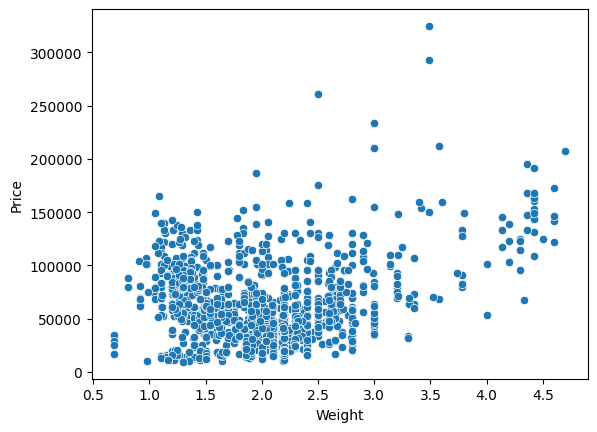

In [78]:
# scatterplot of the weight column
sns.scatterplot(x=df['Weight'],y=df['Price'])

C:\Users\kaift\AppData\Local\Temp\ipykernel_14832\672125513.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

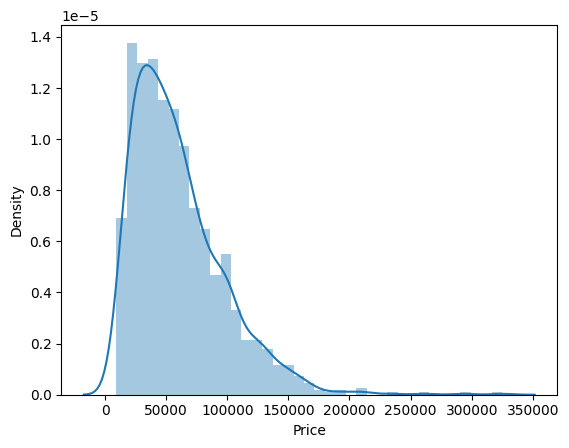

In [79]:
# Price distribution of the laptops
sns.distplot(df['Price'])

Observation:

- It is right skewed therefore we will apply log normal distribution to make it uniform  

C:\Users\kaift\AppData\Local\Temp\ipykernel_14832\2643936424.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

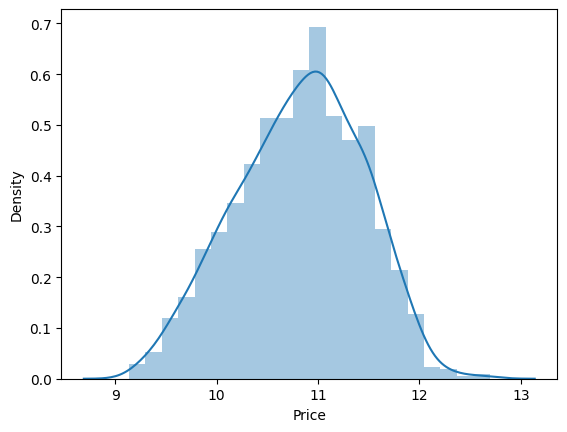

In [80]:
# Applying the log normal distribution
sns.distplot(np.log(df['Price']))

In [81]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [82]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [83]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [85]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [87]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear regression

In [88]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418656
MAE 0.21017827976428838


c:\Users\kaift\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Ridge Regression

In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127331031311809
MAE 0.20926802242582965


c:\Users\kaift\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Lasso Regression

In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853945317105
MAE 0.21114361613472565


c:\Users\kaift\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### KNN

In [91]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

c:\Users\kaift\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8027675291937718
MAE 0.193456293739003


### Decision Tree

In [92]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8449175134156254
MAE 0.18040508368781544


c:\Users\kaift\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### SVM

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

c:\Users\kaift\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8083180902288665
MAE 0.2023905942724332


### Random Forest

In [94]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

c:\Users\kaift\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8873402378382488
MAE 0.15860130110457718


### ExtraTrees

In [95]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

c:\Users\kaift\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8850720167552375
MAE 0.16154538000217084


### AdaBoost

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7980198392022761
MAE 0.2265695558308625


c:\Users\kaift\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Gradient Boost

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

c:\Users\kaift\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8818679653978821
MAE 0.15940088380632747


### XgBoost

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8771404806375557
MAE 0.16262936288951352


c:\Users\kaift\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Voting Regressor

In [99]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

c:\Users\kaift\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8890543388650529
MAE 0.15875285200358927


### Stacking

In [100]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

c:\Users\kaift\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8789373473192841
MAE 0.16717266524916505


### Exporting the Model

In [101]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [102]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [103]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux
